In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils_CNN import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


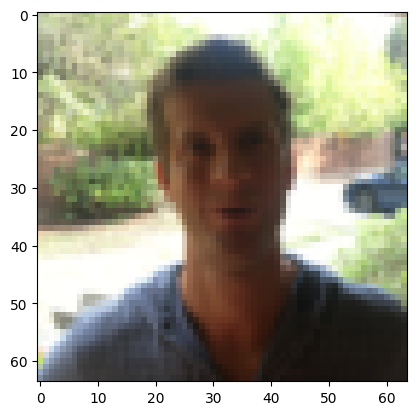

In [3]:
index = 120
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [4]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
        
            ## Conv2D with 32 7x7 filters and stride of 1
            
            ## BatchNormalization for axis 3
            
            ## ReLU
            
            ## Max Pooling 2D with default parameters
            
            ## Flatten layer
            
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            
            # YOUR CODE STARTS HERE
            
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            tfl.Conv2D(filters=32, kernel_size=(7, 7), strides=(1, 1), padding='valid', activation='linear'),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
            tfl.Flatten(),
            tfl.Dense(units=1, activation='sigmoid')
            
            # YOUR CODE ENDS HERE
        ])
    
    return model

In [5]:
happy_model = happyModel()

happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

c:\Users\Daniel Benavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
happy_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 70, 70, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

In [7]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5816 - loss: 1.9973
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9091 - loss: 0.2230
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9383 - loss: 0.1940
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9771 - loss: 0.1036
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9691 - loss: 0.0852
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9373 - loss: 0.1671
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9617 - loss: 0.0964
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9420 - loss: 0.1722
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9840 - loss: 0.0536
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9409 - loss: 0.1652


In [8]:
happy_model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6564 - loss: 1.2682


[1.2932777404785156, 0.6266666650772095]

In [9]:
# SIGNS DATASET
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 2


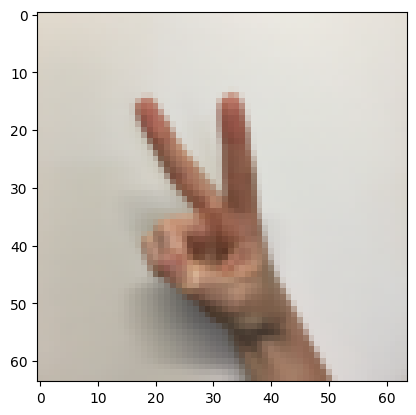

In [10]:
# Example of an image from the dataset
index = 4
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [11]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [12]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    # outputs = None
    # YOUR CODE STARTS HERE
    
    Z1 = tfl.Conv2D(filters=8, kernel_size=(4, 4), strides=(1, 1), padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPooling2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)

    Z2 = tfl.Conv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)

    outputs = tfl.Dense(units=6, activation='softmax')(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [13]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 8)      │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.1397 - loss: 1.8134 - val_accuracy: 0.1667 - val_loss: 1.7873
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1669 - loss: 1.7892 - val_accuracy: 0.2500 - val_loss: 1.7812
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2401 - loss: 1.7821 - val_accuracy: 0.2417 - val_loss: 1.7787
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2504 - loss: 1.7777 - val_accuracy: 0.3333 - val_loss: 1.7745
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2785 - loss: 1.7727 - val_accuracy: 0.3667 - val_loss: 1.7684
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3176 - loss: 1.7665 - val_accuracy: 0.3833 - val_loss: 1.7625
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3699 - loss: 1.7591 - val_accuracy: 0.4083 - val_loss: 1.7551
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3835 - loss: 1.7497 - val_accuracy: 0.

In [15]:
history.history

{'accuracy': [0.14629629254341125,
  0.1935185194015503,
  0.24722221493721008,
  0.27222222089767456,
  0.2768518626689911,
  0.3083333373069763,
  0.3629629611968994,
  0.3777777850627899,
  0.39629629254341125,
  0.41203704476356506,
  0.4148148000240326,
  0.442592591047287,
  0.46203702688217163,
  0.4870370328426361,
  0.5138888955116272,
  0.5472221970558167,
  0.5611110925674438,
  0.5768518447875977,
  0.5935184955596924,
  0.5981481671333313,
  0.6083333492279053,
  0.6166666746139526,
  0.6231481432914734,
  0.6361111402511597,
  0.644444465637207,
  0.6620370149612427,
  0.6777777671813965,
  0.6787037253379822,
  0.6925926208496094,
  0.6990740895271301,
  0.7046296000480652,
  0.7064814567565918,
  0.7111111283302307,
  0.7175925970077515,
  0.7212963104248047,
  0.7240740656852722,
  0.7324073910713196,
  0.7361111044883728,
  0.7435185313224792,
  0.7462962865829468,
  0.7509258985519409,
  0.7555555701255798,
  0.7629629373550415,
  0.7657407522201538,
  0.774074077606

C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_22792\162880813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_22792\162880813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

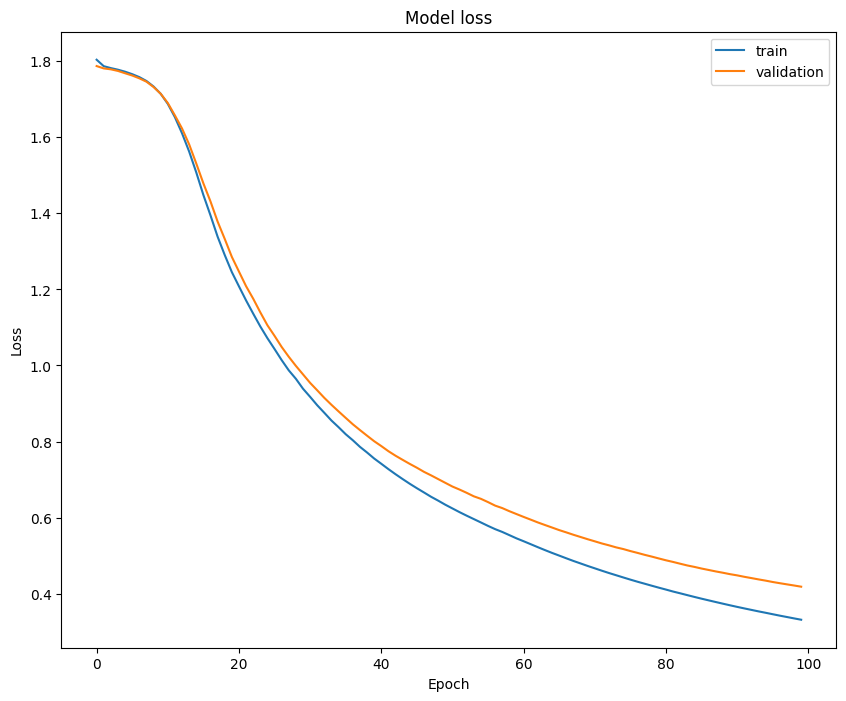

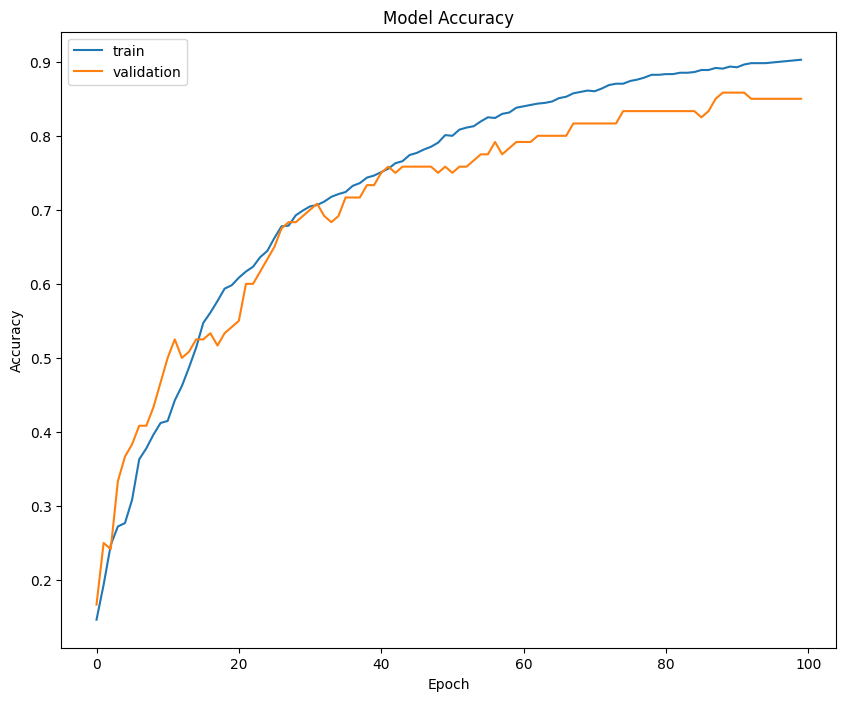

In [16]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(10,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(10,8)).set(xlabel='Epoch',ylabel='Accuracy')